In [1]:
import os
import cv2
from tqdm import tqdm

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [4]:
selected_classes = ['Salak 1', 'Apricot 1', 'Avocado 1', 'Banana 1', 'Cherry 2'] 

In [5]:
def load_and_preprocess_image(file_path, target_size=(100, 100)):
    try:
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)  
        return img.flatten()  
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return None

def load_images_with_classes(directory, selected_classes):
    images, labels, class_names = [], [], []
    class_map = {}

    for i, class_name in enumerate(selected_classes):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue  
        class_map[class_name] = i
        class_names.append(class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            if file_name.endswith(".jpg"):
                img = load_and_preprocess_image(file_path)
                if img is not None:
                    images.append(img)
                    labels.append(i)
    
    return np.array(images), np.array(labels), class_names
    

In [6]:
train_dir = r"C:\Users\DELL\Downloads\machineWithPython\fruitsDataSet\fruits-360_dataset_100x100\fruits-360\Training"
test_dir = r"C:\Users\DELL\Downloads\machineWithPython\fruitsDataSet\fruits-360_dataset_100x100\fruits-360\Test"
train_images, train_labels, class_names = load_images_with_classes(train_dir, selected_classes)
test_images, test_labels, _ = load_images_with_classes(test_dir, selected_classes)

In [7]:
print(f"X_train shape: {train_images.shape}")
print(f"y_train shape: {test_images.shape}")

X_train shape: (2637, 10000)
y_train shape: (881, 10000)


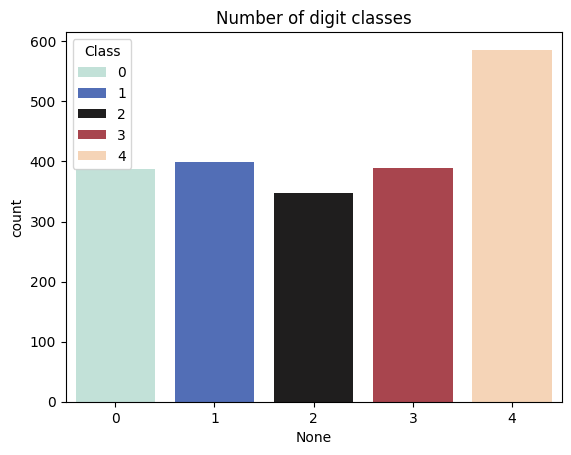

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_series, hue=y_train_series, palette="icefire")

plt.title("Number of digit classes")

plt.legend(title="Class")

plt.show()




In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [9]:
# Normalizing the data by dividing by 255.0
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
k = 3 
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)

In [12]:

knn.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [13]:

Y_pred = knn.predict(X_test)
Y_pred


array([4, 3, 2, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 2, 4, 0, 4, 3, 3, 4,
       2, 2, 4, 0, 4, 1, 1, 2, 3, 1, 4, 2, 0, 4, 2, 0, 2, 1, 4, 2, 3, 3,
       0, 1, 3, 0, 0, 4, 0, 1, 0, 3, 4, 0, 3, 2, 4, 4, 3, 1, 1, 4, 2, 1,
       4, 4, 4, 1, 0, 4, 1, 3, 4, 2, 4, 1, 0, 4, 4, 2, 3, 1, 3, 4, 3, 3,
       2, 1, 1, 0, 3, 3, 3, 4, 0, 2, 0, 0, 1, 4, 4, 3, 0, 3, 4, 4, 3, 1,
       0, 4, 0, 1, 4, 0, 1, 2, 1, 4, 4, 2, 1, 0, 4, 4, 0, 1, 0, 3, 4, 1,
       4, 2, 2, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 1, 1, 2, 4, 2, 3, 3, 1,
       3, 2, 3, 1, 2, 0, 0, 4, 4, 3, 1, 4, 3, 4, 4, 4, 1, 1, 3, 1, 1, 1,
       3, 1, 4, 2, 3, 4, 4, 4, 4, 1, 2, 4, 4, 1, 0, 4, 2, 2, 1, 4, 0, 4,
       4, 4, 0, 1, 4, 4, 4, 3, 3, 3, 4, 0, 1, 1, 3, 0, 0, 4, 4, 4, 1, 3,
       0, 1, 4, 0, 2, 1, 4, 1, 3, 0, 3, 3, 1, 2, 3, 2, 4, 4, 2, 0, 2, 1,
       0, 3, 1, 3, 3, 1, 2, 1, 0, 4, 4, 2, 4, 4, 3, 3, 3, 2, 1, 4, 0, 1,
       4, 4, 0, 0, 4, 2, 0, 3, 0, 3, 2, 2, 2, 1, 4, 4, 3, 0, 3, 3, 4, 4,
       4, 2, 4, 0, 1, 3, 1, 4, 2, 4, 3, 4, 0, 2, 4,

In [16]:

accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


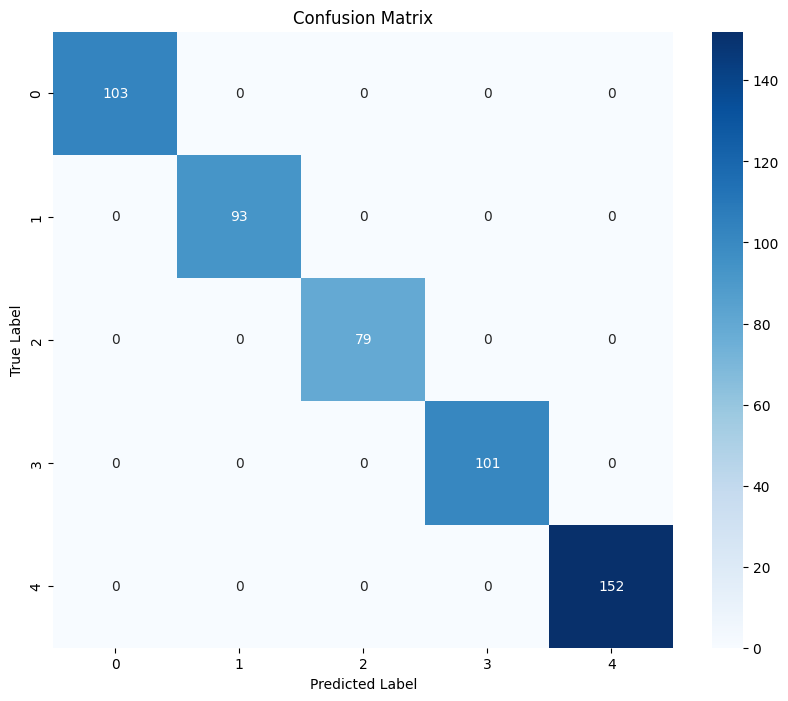

In [18]:

cm = confusion_matrix(y_test, Y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, Y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00       101
           4       1.00      1.00      1.00       152

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



In [31]:
print(X_test.shape)  


(528, 10000)


In [32]:
img = X_test[i].reshape(100, 100)


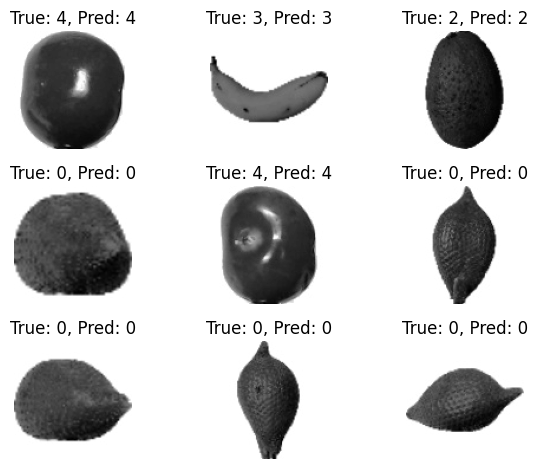

In [33]:
for i in range(9): 
    plt.subplot(3, 3, i + 1)  
    
    img = X_test[i].reshape(100, 100) 
    
    plt.imshow(img, cmap='gray')  
    plt.title(f"True: {y_test[i]}, Pred: {Y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import accuracy_score, log_loss

history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
for epoch in range(1, 51):
    print(f"Epoch {epoch}")
    
    knn.fit(X_train, y_train)
    
    y_train_prob = knn.predict_proba(X_train)
    y_val_prob = knn.predict_proba(X_test)
    
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_val_pred)
    
    train_loss = log_loss(y_train, y_train_prob)
    val_loss = log_loss(y_test, y_val_prob)
    
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    print(f"Train Accuracy: {train_acc:.4f} | Val Accuracy: {val_acc:.4f}")

Epoch 1
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 2
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 3
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 4
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 5
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 6
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 7
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 8
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 9
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 10
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 11
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Acc

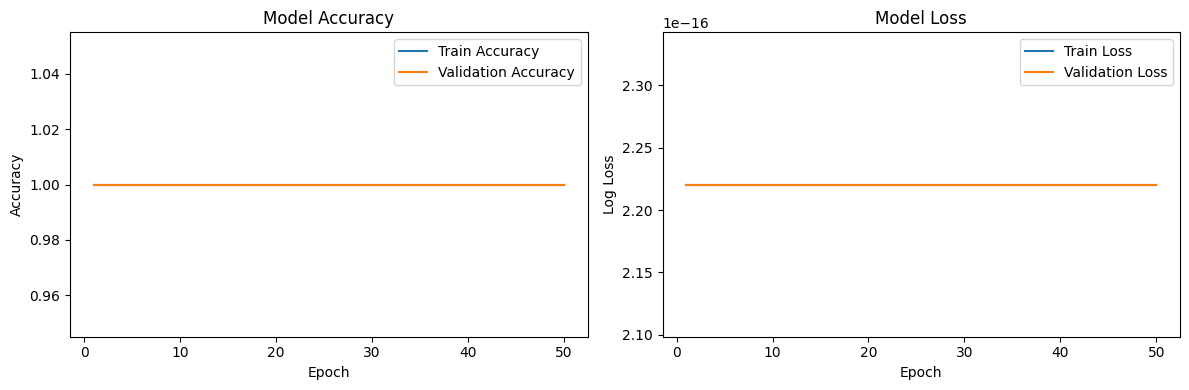

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(range(1, 51), history['train_acc'], label='Train Accuracy', color='tab:blue')
ax1.plot(range(1, 51), history['val_acc'], label='Validation Accuracy', color='tab:orange')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(1, 51), history['train_loss'], label='Train Loss', color='tab:blue')
ax2.plot(range(1, 51), history['val_loss'], label='Validation Loss', color='tab:orange')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Log Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [43]:
y_pred_prob = knn.predict_proba(X_test)

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC on Test Set: {roc_auc:.2f}')


ROC AUC on Test Set: 1.00


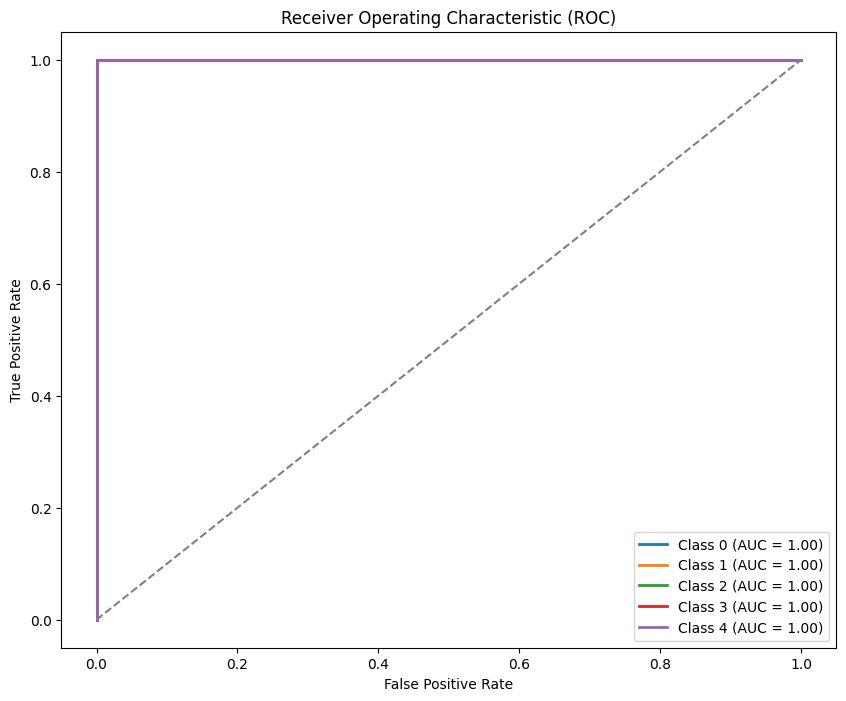

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))

for i in range(y_pred_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [52]:
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")


AUC: 1.00


In [53]:
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [54]:
knnPCA = KNeighborsClassifier(n_neighbors=5)
knnPCA.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [55]:
y_pred_PCA = knnPCA.predict(X_test_pca)

In [57]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, Y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00       101
           4       1.00      1.00      1.00       152

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



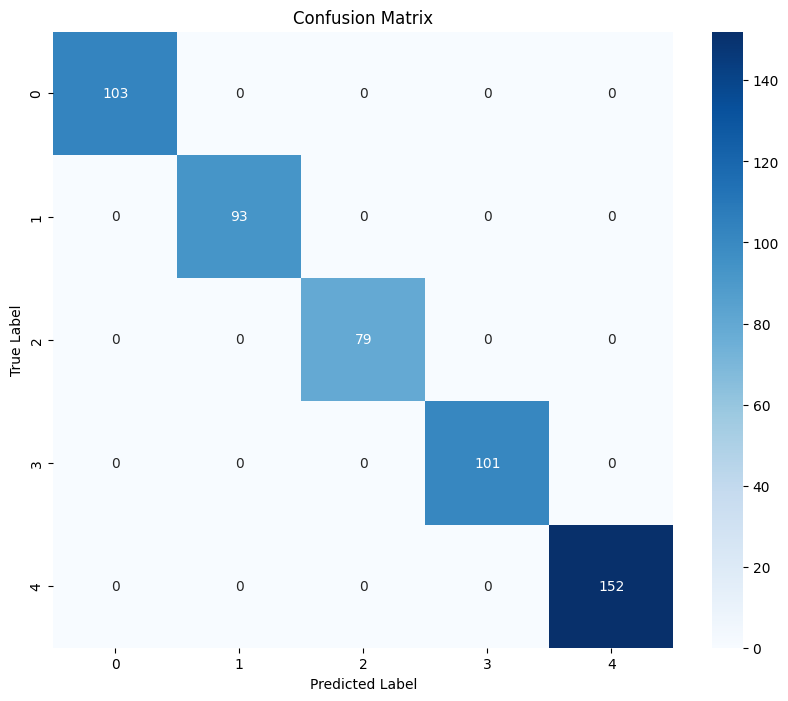

In [58]:

cm = confusion_matrix(y_test, Y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [59]:
y_pred_prob = knnPCA.predict_proba(X_test_pca)

In [60]:
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr')
print(f'ROC AUC on Test Set: {roc_auc:.2f}')

ROC AUC on Test Set: 0.98


In [61]:
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
for epoch in range(1, 6):
    print(f"Epoch {epoch}")
    
    knn.fit(X_train_pca, y_train)
    
    y_train_prob = knn.predict_proba(X_train_pca)
    y_val_prob = knn.predict_proba(X_test_pca)
    
    y_train_pred = knn.predict(X_train_pca)
    y_val_pred = knn.predict(X_test_pca)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_val_pred)
    
    train_loss = log_loss(y_train, y_train_prob)
    val_loss = log_loss(y_test, y_val_prob)
    
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    print(f"Train Accuracy: {train_acc:.4f} | Val Accuracy: {val_acc:.4f}")

Epoch 1
Train Loss: 0.0992 | Val Loss: 1.4900
Train Accuracy: 0.9516 | Val Accuracy: 0.8864
Epoch 2
Train Loss: 0.0992 | Val Loss: 1.4900
Train Accuracy: 0.9516 | Val Accuracy: 0.8864
Epoch 3
Train Loss: 0.0992 | Val Loss: 1.4900
Train Accuracy: 0.9516 | Val Accuracy: 0.8864
Epoch 4
Train Loss: 0.0992 | Val Loss: 1.4900
Train Accuracy: 0.9516 | Val Accuracy: 0.8864
Epoch 5
Train Loss: 0.0992 | Val Loss: 1.4900
Train Accuracy: 0.9516 | Val Accuracy: 0.8864


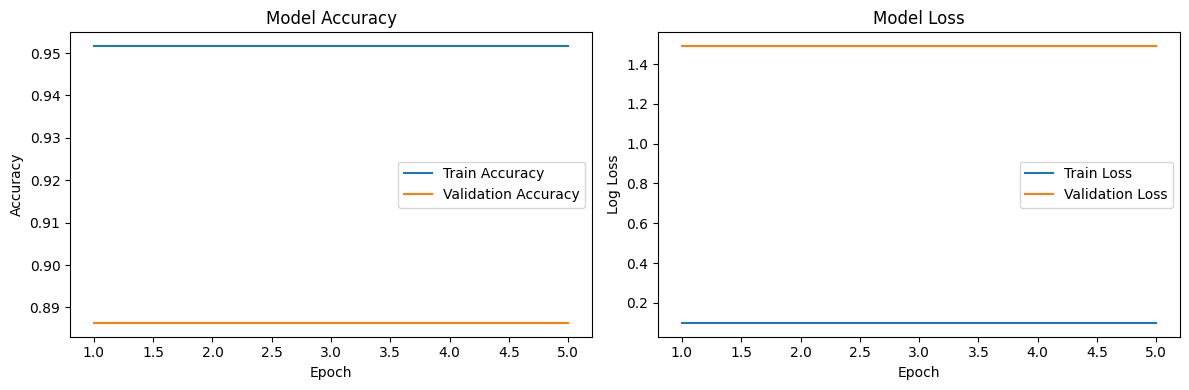

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(range(1, 6), history['train_acc'], label='Train Accuracy', color='tab:blue')
ax1.plot(range(1, 6), history['val_acc'], label='Validation Accuracy', color='tab:orange')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(1, 6), history['train_loss'], label='Train Loss', color='tab:blue')
ax2.plot(range(1, 6), history['val_loss'], label='Validation Loss', color='tab:orange')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Log Loss')
ax2.legend()

plt.tight_layout()
plt.show()

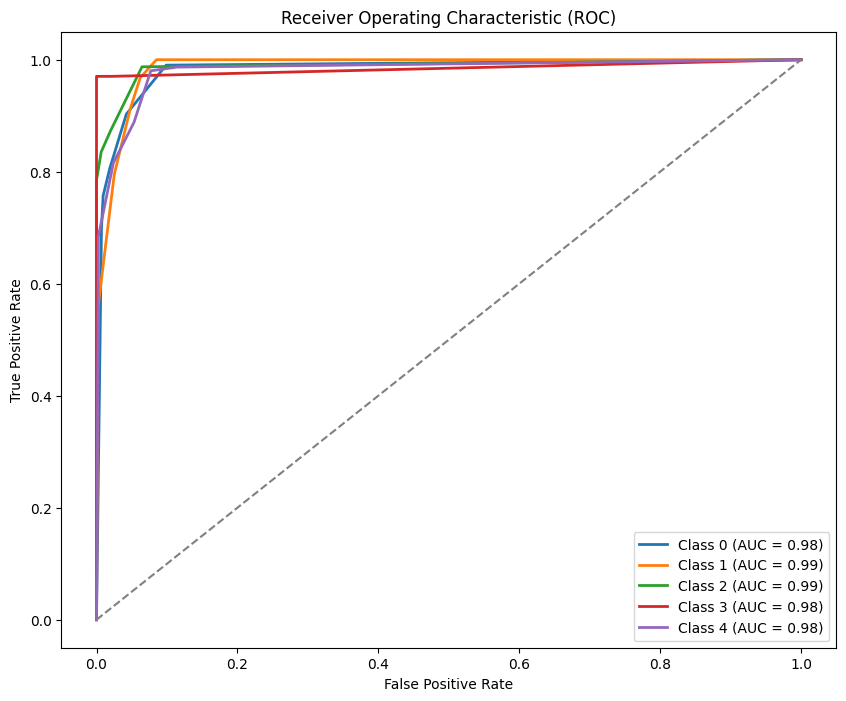

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))

for i in range(y_pred_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [65]:
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")


AUC: 0.98
